## Task 1


For this task you will use the data from the Three Stimulus Auditory Oddball Task.
James F Cavanagh and Davin Quinn (2021). EEG: Three-Stim Auditory Oddball and Rest in Acute and Chronic TBI.
OpenNeuro. [Dataset] doi: 10.18112/openneuro.ds003522.v1.1.0

Reference:
Cavanagh JF, Wilson JK, Rieger RE, Gill D, Broadway JM, Story Remer JH, Fratzke V, Mayer AR, Quinn DK.
ERPs predict symptomatic distress and recovery in sub-acute mild traumatic brain injury. Neuropsychologia. 2019 Sep;132:107125.
doi: 10.1016/j.neuropsychologia.2019.107125. Epub 2019 Jun 19. PMID: 31228481; PMCID: PMC6702033.

EEG was recorded from the following three groups of participants while they performed a three-stimulus auditory oddball task:
- Control participants (group1)
- Participants with sub-acute mild TBI (Traumatic Brain Injury) (Group0)
- Participants with chronic TBI (group2)

Three sessions of recording were carried out:
Session 1: 3 to 14 days following injury
Session 2: an average of 2 months post-injury.
Session 3: an average of 4 months after session 1.

In this task, the participants were presented with three different auditory stimuli:
- a standard stimulus (presented 80% of the time)
- a novel, non-target stimulus (presented 10% of the time)
- a novel target stimulus (presented 10% of the time)

The datasets related to this study are in the data folder and are entitled:
- **sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.set** and corresponding associated **sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.fdt** file
- **sub-004_ses-02_task-ThreeStimAuditoryOddball_eeg_segment1.set** and its corresponding **sub-004_ses-02_task-ThreeStimAuditoryOddball_eeg_segment1.fdt file**


<div class="alert alert-block alert-warning">
<Important!</b>
For this task, you will work from data from sessions 1 of the study. So you will need to load in the files: sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.set.
If you are working in Binder, you will need to upload these two files to the data folder :

- sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.set
- sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.fdt.
</div>


## Task 1 instructions

Using the script **DSC-EEG-Script1_students** as a guide carry out the following:

- To get you started, the code is provided for loading in and visualizing the raw data. 
- Extract the following dataset information:
    - the sampling frequency (Hz)
    - the names and the type of the channels
    - the number of sample points
    - the time vector 
- Determine and display the temporal resolution of the dataset. Hint: use the sampling frequency.  
- Do you need to remove the DC component? Do this if needed.
- What reference will you apply to the data? Plot the referenced data. 
- Can you spot any artifacts in the data? Can you identify the artifact?
- Present a **temporal** and **spatial** visualization of the artifact. For the temporal visualization you can plot one or several individual electrodes. 

- Load in the dataset corresponding to the second session, **Session 2** and carry out the same visualisation and processing steps as for the first baseline run. Then compare the two datasets.

Do you notice any differences between the two? 
If so, present figures that highlight these differences. 

<div class="alert alert-block alert-warning">
<Note!</b>
I have added the code that allows you to calculate the average activity over a time interval and plot the spatial distribution of this activity as a topography or topographic map. 

</div>


Reading /Users/bolger/PycharmProjects/DSC2024-EEG-Jupyter/data/sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.fdt
Reading 0 ... 25000  =      0.000 ...    50.000 secs...
Using matplotlib as 2D backend.


/var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/ipykernel_96603/3400003551.py:15: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  rawIn = mne.io.read_raw_eeglab(fullpath, preload=True)
/var/folders/60/tv1lj_b10zq7ypz5s1kvq4_cr3bc6f/T/ipykernel_96603/3400003551.py:15: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  rawIn = mne.io.read_raw_eeglab(fullpath, preload=True)


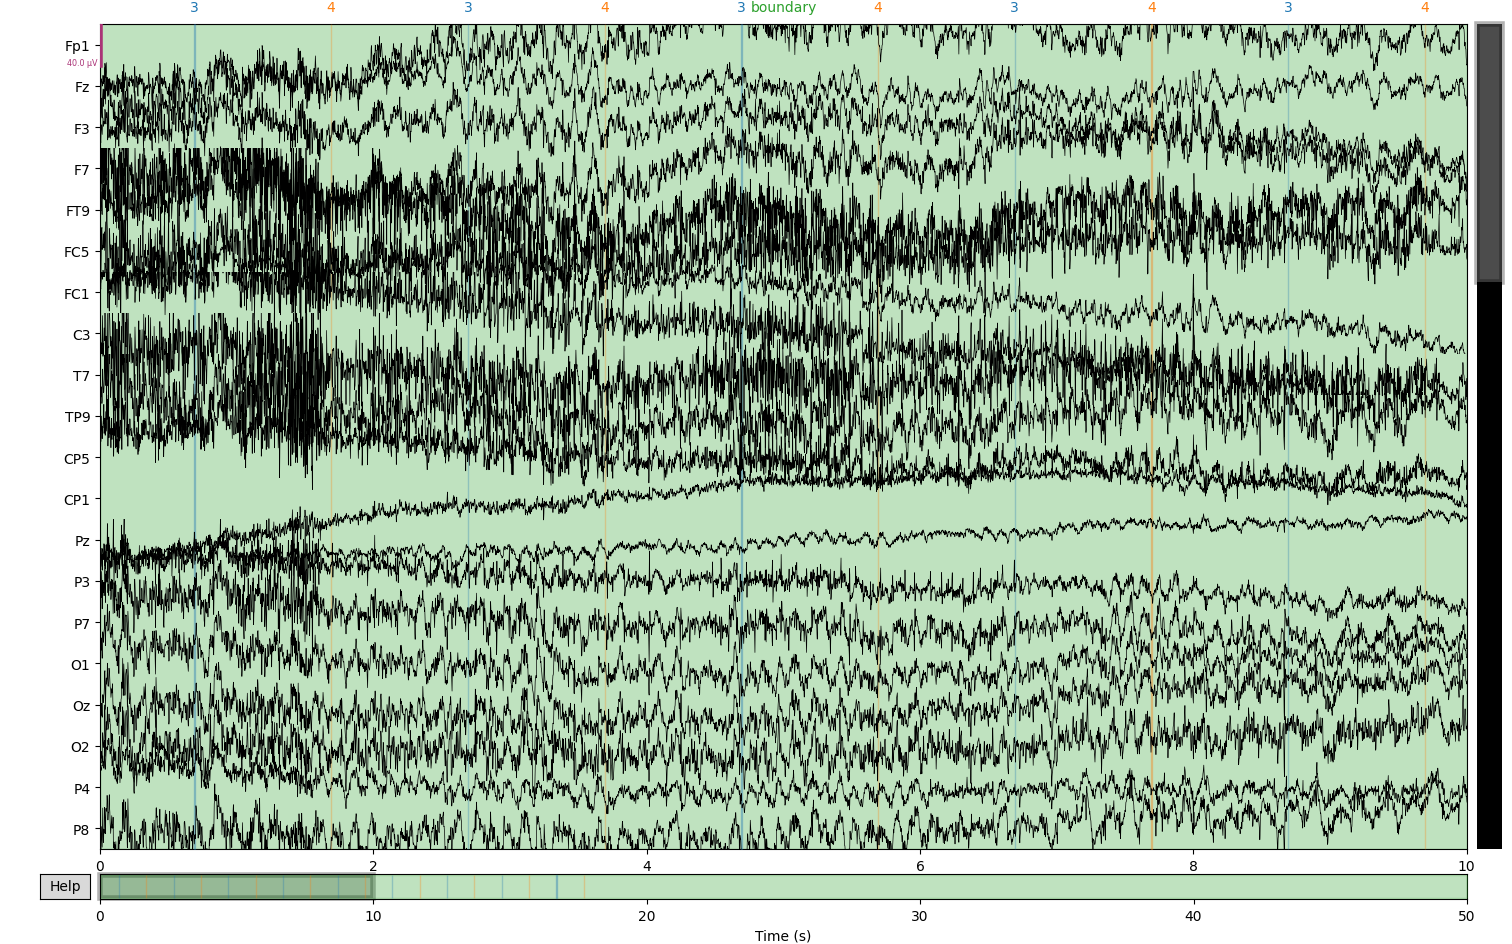

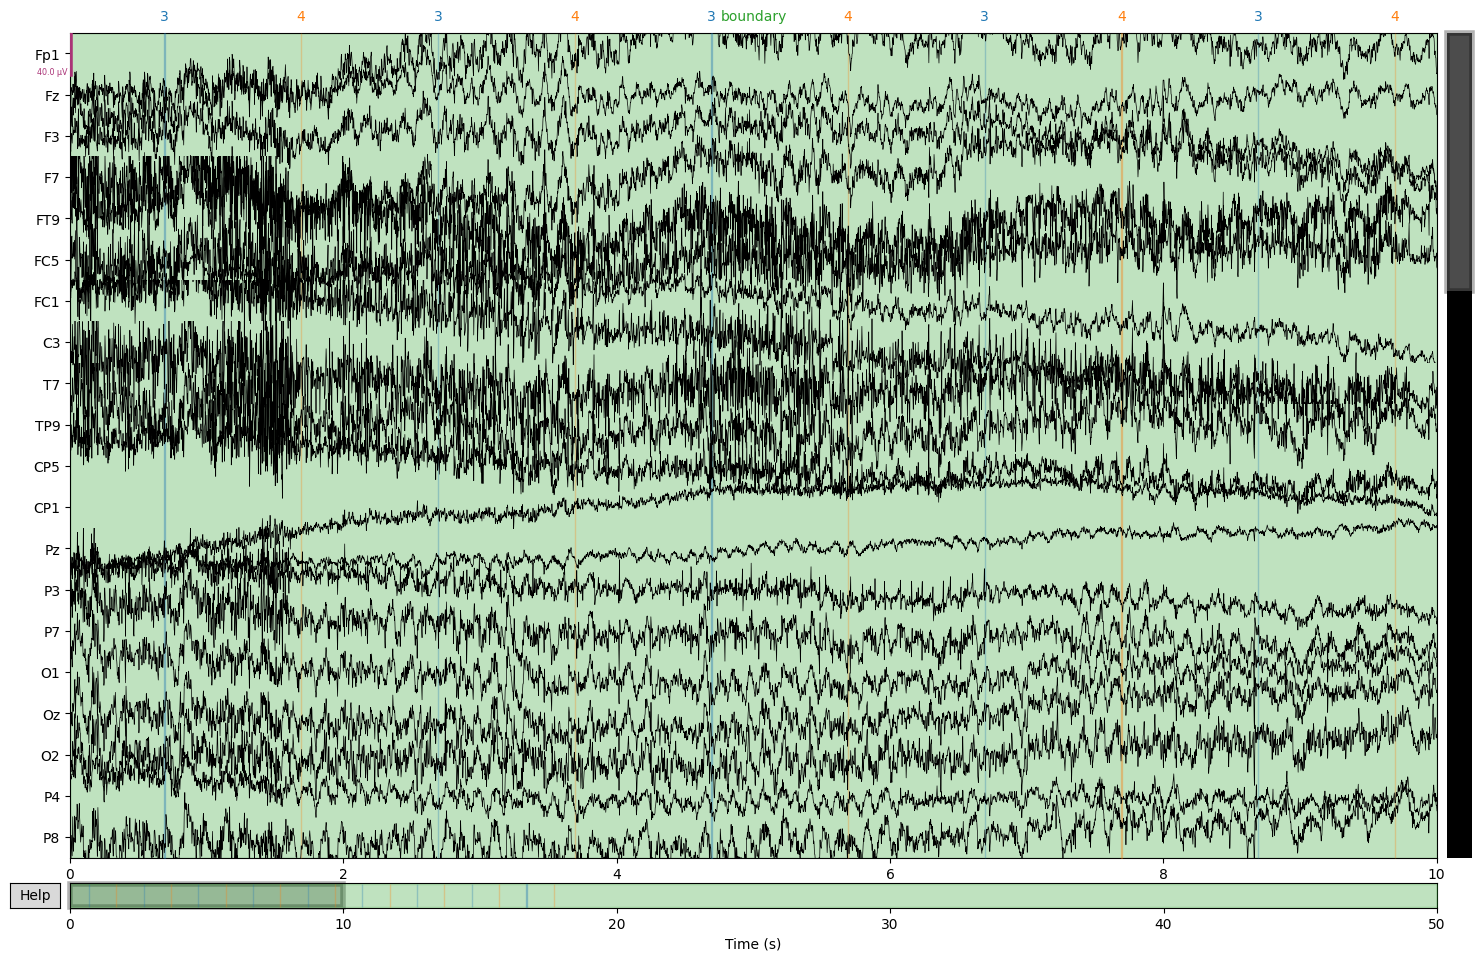

In [1]:
# Put your code in cells here. Maybe a cell per answer...
# Don't forget to import the required packages.
# The matplotlib widget line faciltates the presentation of interactive plots.

%matplotlib widget
import mne
import os
import matplotlib.pyplot as plt
import numpy as np

# Help for loading in the *.set file:
filename = 'sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.set' # This .set file will automatically look for its corresponding *.fdt file
filepath = 'data'
fullpath = os.path.join(filepath, filename)
rawIn = mne.io.read_raw_eeglab(fullpath, preload=True)
rawIn.plot()


### Assign channel types to the raw object
This will allow us to distinguish between scalp electrodes and external electrodes positioned on the face to record
eye movements. 
**VEOG** means *Vertical Electro-oculograms*, otherwise called **eye-blinks**

In [2]:
rawIn.info['ch_names']

my_dict = {'VEOG': 'eog'}
print(my_dict)
rawIn.set_channel_types(my_dict)  # Apply the channel type to our raw object.

{'VEOG': 'eog'}


<RawEEGLAB | sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.fdt, 64 x 25001 (50.0 s), ~12.3 MB, data loaded>

### Preparing the raw object so that we can plot the topography.

In addition to looking at the signal as a function, we can look at the spatial distribution 
of activity across the head (topography) over a given time interval.
A topography over a time interval can be used to highlight activity at a specific time interval. 
To plot a single topography, we need to define a vector of the mean activity over define time interval for each
electrode.

Before we can visualize the topography, we need to define the electrode layout or **montage** that corresponds to 
the current dataset's configuration. 

Here the **montage** is the standard **10-20 configuration** which defines how the electrodes are positioned relative to one another on the scalp. The inter-electrode distance is either 10% or 20% of the total length and width of the head. 

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


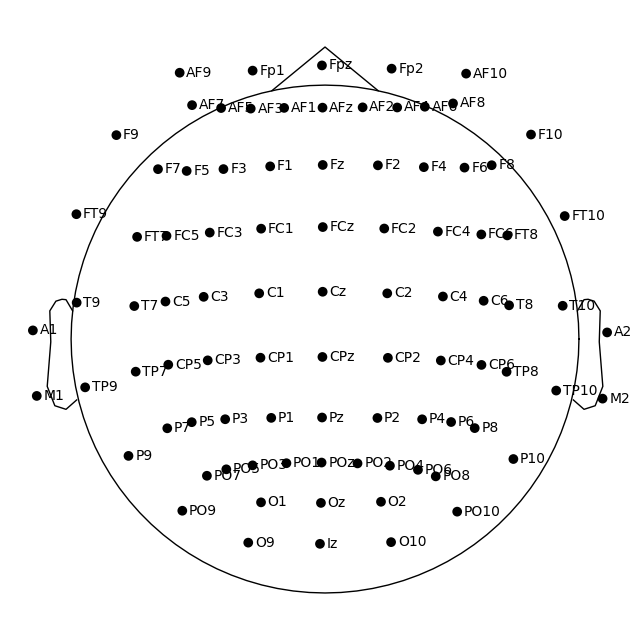

<RawEEGLAB | sub-004_ses-01_task-ThreeStimAuditoryOddball_eeg_segment1.fdt, 64 x 25001 (50.0 s), ~12.3 MB, data loaded>

In [3]:
## Assign the standard 10-20 montage to the raw object. 

montage = mne.channels.make_standard_montage('standard_1020')  # Assigning the standard 10-20 montage
mne.viz.plot_montage(mne.channels.make_standard_montage('standard_1020'))  # Visualize the montage
rawIn.set_montage(montage)                                                 # Assign the 10-20 montage to the raw object.

In [ ]:
timeIntval = [10, 15]                       # Defining the time interval (10-15 seconds) over which to plot the topography.
timeIndx = rawIn.time_as_index(timeIntval)  # Express the times in seconds as indices using the time_as_index() method.
chanRange = np.arange(0, 63)                # We will plot only the first 63 electrodes, the scalp electrodes.

# Extract the data from the raw object as an array with dimensions Channel number X Time points
dataIn = np.array(rawIn.get_data())
dataSeg1 = dataIn[chanRange, timeIndx[0]:timeIndx[1]]
dataSeg_mean = np.mean(dataSeg1, 1)

# Visualise the average activity over the time interval as a topography. 
fig1, ax1 = plt.subplots(1)
mne.viz.plot_topomap(dataSeg_mean, rawIn.info, ch_type='eeg', axes=ax1)